In [228]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [229]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [230]:
np.random.seed(1111)

#Dictionaries
resultsdic = {}
epsilondic = {}
mean = np.zeros(3)

#loop over jobs
for j in par.v: 
    resultsdic[f'results{j}'] = np.zeros(par.K)
    epsilondic[f'epsilon{j}'] = np.random.normal(loc=0, scale=par.sigma, size=par.K)

    for i in range(par.K):
        resultsdic[f'results{j}'][i] = j + epsilondic[f"epsilon{j}"][i]     #utility
    mean[j-1] = np.mean(resultsdic[f"results{j}"])

print(mean)


[1.01120537 1.99782087 2.97917864]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [231]:
np.random.seed(2222)

#Dictionaries
friendepsdic = {}
ownepsdic = {}
friendudic = {}
ownudic = {}

utildedic = {}
umaxindexdic = {}
jstardic = {}
expudic = {}
udic = {}

#Arrays for each i in each dictionary
for i in par.F:
    friendepsdic[f"friendeps{i}"] = []
    ownepsdic[f"owneps{i}"] = []
    friendudic[f"friendu{i}"] = []
    ownudic[f"ownu{i}"] = []

    utildedic[f"utilde{i}"] = []
    umaxindexdic[f"umaxindex{i}"] = []
    jstardic[f"jstar{i}"] = []
    expudic[f"expu{i}"] = []
    udic[f"u{i}"] = []

#Loop K times
for K in range(par.K):
    for i in par.F:
        #draw epsilons and calculate associated utility
        friendeps = np.random.normal(loc=0, scale=par.sigma, size=(i, par.J))
        owneps= np.random.normal(loc=0, scale=par.sigma, size=(par.J))
        friendu = friendeps + par.v
        ownu = owneps + par.v
        
        #Save
        friendepsdic[f"friendeps{i}"].append(friendeps)
        ownepsdic[f"owneps{i}"].append(owneps)
        friendudic[f"friendu{i}"].append(friendu)
        ownudic[f"ownu{i}"].append(ownu)

        #calculate more stuff
        utilde = np.mean(friendu, axis=0)   #exp. utility for each job
        umaxindex = np.argmax(utilde)   #index for job w highest utility
        jstar = umaxindex + 1   #job with highest utility
        expu = np.max(utilde)   #expected utility
        u = ownu[umaxindex]     #actual (realized) utility

        #save
        utildedic[f"utilde{i}"].append(utilde)
        umaxindexdic[f"umaxindex{i}"].append(umaxindex)
        jstardic[f"jstar{i}"].append(jstar)
        expudic[f"expu{i}"].append(expu)
        udic[f"u{i}"].append(u)

#Dictionaries
numjdic = {}
meanexpudic= {}
meanudic = {}

for i in par.F:
    #Count jobs
    ones = np.sum(np.array(jstardic[f"jstar{i}"]) == 1)
    twos = np.sum(np.array(jstardic[f"jstar{i}"]) == 2)
    threes=np.sum(np.array(jstardic[f"jstar{i}"]) == 3)
    numjdic[f"numj{i}"] = np.array([ones, twos, threes]) / par.K

    #Get mean utilites
    meanexpudic[f"meanexpu{i}"] = np.mean(np.array(expudic[f"expu{i}"]))
    meanudic[f"meanu{i}"] = np.mean(np.array(udic[f"u{i}"]))

    # print(f"i: {i}")
    # print(f"numj{i}: {numjdic[f'numj{i}']}")
    # print(meanexpudic[f"meanexpu{i}"])
    # print(meanudic[f"meanu{i}"])
    # print("")

# print("friendepsdic:", friendepsdic)
# print("ownepsdic:", ownepsdic)
# print("friendudic:", friendudic)
# print("ownudic:", ownudic)
# print("utildedic:", utildedic)
# print("umaxindexdic:", umaxindexdic)
# print("jstardic:", jstardic)
# print("expudic:", expudic)
# print("udic:", udic)


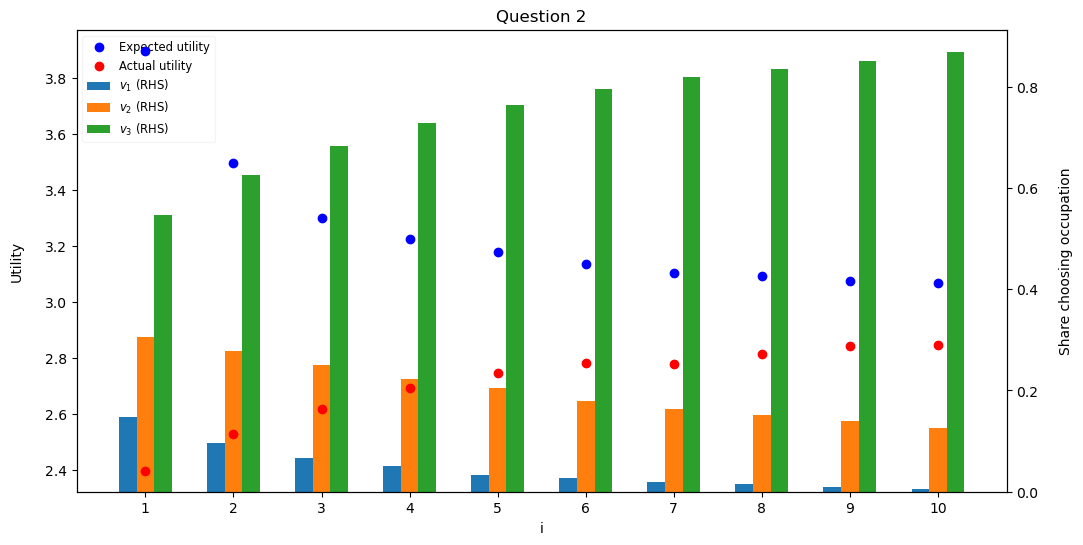

In [232]:
#Visualize

careerchoice = np.array(list(numjdic.values()))
expudata = np.array(list(meanexpudic.values()))
udata = np.array(list(meanudic.values()))

groups = par.N
bars = par.J

bar_width = 0.2
indices = np.arange(groups)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

#Have to swap the y axes so dots are on top of bars, because apparently z-order cant do that ... (want utility on LHS)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.spines['right'].set_position(('outward', 0))

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.spines['left'].set_position(('outward', 0))


for i in range(bars):
    ax1.bar(indices + i * bar_width, careerchoice[:, i], bar_width, label=f'$v_{i+1}$ (RHS)', zorder=1)

scatter_expudata = ax2.scatter(indices + bar_width, expudata[:], color='blue', label='Expected utility', zorder=5)
scatter_udata = ax2.scatter(indices + bar_width, udata[:], color='red', label='Actual utility', zorder=6)

ax1.set_xlabel('i')
ax1.set_ylabel('Share choosing occupation', labelpad=15)
ax1.set_title('Question 2')
ax1.set_xticks(indices + bar_width * (bars - 1) / 2)
ax1.set_xticklabels(np.arange(1, groups + 1))
ax2.set_ylabel('Utility', labelpad=15)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles2 + handles1, labels2 + labels1, fontsize='small', loc='best',framealpha=0.2)

plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [233]:
#Dictionaries!

utilde2dic = {}
umaxindex2dic = {}
jstar2dic = {}
expu2dic = {}
u2dic = {}

#Arrays for each i!
for i in par.F:
    utilde2dic[f"utilde2{i}"] = []
    umaxindex2dic[f"umaxindex2{i}"] = []
    jstar2dic[f"jstar2{i}"] = []
    expu2dic[f"expu2{i}"] = []
    u2dic[f"u2{i}"] = []

for i in par.F:
    for K in range(par.K):
        #expected utility for each occupation 
        utilde2 = np.array(utildedic[f"utilde{i}"][K]) - par.c
        utilde2[umaxindexdic[f"umaxindex{i}"][K]] = udic[f"u{i}"][K]
        utilde2dic[f"utilde2{i}"].append(utilde2)
        
        umaxindex2 = np.argmax(utilde2)     #index of best job
        jstar2 = umaxindex2 + 1     #best job
        expu2 = np.max(utilde2)     #exp utility
        #actual utility:
        u2 = ownudic[f"ownu{i}"][K][umaxindex2]
        if umaxindex2 != umaxindexdic[f"umaxindex{i}"][K]:
            u2 = u2 - par.c

        #Save
        umaxindex2dic[f"umaxindex2{i}"].append(umaxindex2)
        jstar2dic[f"jstar2{i}"].append(jstar2)
        expu2dic[f"expu2{i}"].append(expu2)
        u2dic[f"u2{i}"].append(u2)

#Dictionaries
changegivenjdic = {}
meanexpu2dic = {}
meanu2dic = {}

for i in par.F:
    changegivenjdic[f"changegivenj{i}"] = [0,0,0]
    for j in par.v:
        #count share that changes from each job:
        changegivenjdic[f"changegivenj{i}"][j-1] = np.sum((np.array(jstardic[f"jstar{i}"]) == j) & (np.array(jstardic[f"jstar{i}"]) != np.array(jstar2dic[f"jstar2{i}"]))) / np.sum((np.array(jstardic[f"jstar{i}"]) == j))
    
    #mean utilites
    meanexpu2dic[f"meanexpu2{i}"] = np.mean(np.array(expu2dic[f"expu2{i}"]))
    meanu2dic[f"meanu2{i}"] = np.mean(np.array(u2dic[f"u2{i}"]))
    
    # print(f"i: {i}")    
    # print(changegivenjdic[f"changegivenj{i}"])
    # print(meanexpudic[f"meanexpu{i}"])
    # print(meanudic[f"meanu{i}"])
    # print("")

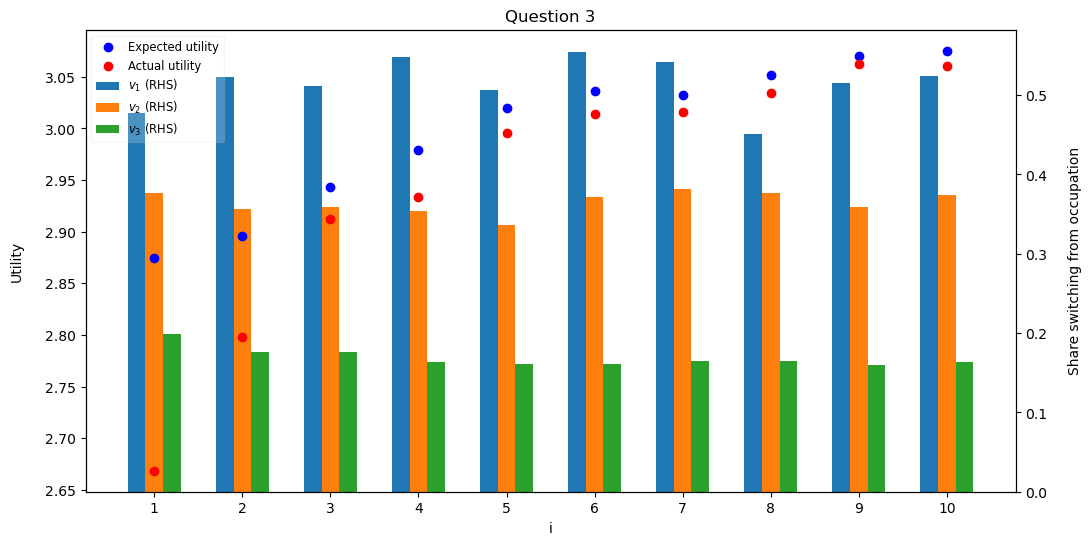

In [237]:
#Visualize

careerchoice = np.array(list(changegivenjdic.values()))
expudata = np.array(list(meanexpu2dic.values()))
udata = np.array(list(meanu2dic.values()))

groups = par.N
bars = par.J
labels = ["$v_1$", "$v_2$", "$v_3$"]

bar_width = 0.2
indices = np.arange(groups)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()


ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.spines['right'].set_position(('outward', 0))

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.spines['left'].set_position(('outward', 0))

for i in range(bars):
    ax1.bar(indices + i * bar_width, careerchoice[:, i], bar_width, label=f'$v_{i+1}$ (RHS)', zorder=1)

scatter_expudata = ax2.scatter(indices + bar_width, expudata[:], color='blue', label='Expected utility', zorder=5)
scatter_udata = ax2.scatter(indices + bar_width, udata[:], color='red', label='Actual utility', zorder=6)

scatter_expudata.set_zorder(5)
scatter_udata.set_zorder(6)

ax1.set_xlabel('i')
ax1.set_ylabel('Share switching from occupation', labelpad=15)
ax1.set_title('Question 3')
ax1.set_xticks(indices + bar_width * (bars - 1) / 2)
ax1.set_xticklabels(np.arange(1, groups + 1))
ax2.set_ylabel('Utility', labelpad=15)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles2 + handles1, labels2 + labels1, fontsize='small', loc='upper left',framealpha=0.2)

plt.show()

In [235]:
#Example case

# for i in par.F:
#     print(f"i: {i}")    
#     print("K = 1 values:")
#     print(f"friendeps: {friendepsdic[f'friendeps{i}'][0]}")
#     print(f"owneps: {ownepsdic[f'owneps{i}'][0]}")
#     print(f"friendu: {friendudic[f'friendu{i}'][0]}")
#     print(f"ownu: {ownudic[f'ownu{i}'][0]}")
#     print(f"utilde: {utildedic[f'utilde{i}'][0]}")
#     print(f"umaxindex: {umaxindexdic[f'umaxindex{i}'][0]}")
#     print(f"jstar: {jstardic[f'jstar{i}'][0]}")
#     print(f"expu: {expudic[f'expu{i}'][0]}")
#     print(f"u: {udic[f'u{i}'][0]}")
#     print(f"utilde2: {utilde2dic[f'utilde2{i}'][0]}")
#     print(f"umaxindex2: {umaxindex2dic[f'umaxindex2{i}'][0]}")
#     print(f"jstar2: {jstar2dic[f'jstar2{i}'][0]}")
#     print(f"expu2: {expu2dic[f'expu2{i}'][0]}")
#     print(f"u2: {u2dic[f'u2{i}'][0]}")
#     print(f"numj: {numjdic[f'numj{i}']}")
#     print(f"meanexpu: {meanexpudic[f'meanexpu{i}']}")
#     print(f"meanu: {meanudic[f'meanu{i}']}")
#     print(f"changegivenj: {changegivenjdic[f'changegivenj{i}']}")
#     print(f"meanexpu2: {meanexpu2dic[f'meanexpu2{i}']}")
#     print(f"meanu2: {meanu2dic[f'meanu2{i}']}")
#     print("")